## Building a Linear Regression Model

The intent behind this excerise is to understand and code the algorithm in a basic linear regression model 

In [ ]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt

In [66]:
dataset = pd.read_csv("train.csv")
dataset.shape

X = np.array(dataset[['LotArea', 'OverallQual', 'OverallCond']])
Y = np.array(dataset['SalePrice'])
print(X.shape, Y.shape)
np.random.seed(2)

(1460, 3) (1460,)


In [92]:
Y = np.reshape(Y, (len(Y), 1))
m = X.shape[0]

n_inputs = X.shape[1]
n_inputs


W = np.random.rand(n_inputs).reshape((1, n_inputs))
B = np.random.rand(1).reshape((1,1))

learning_rate = 0.0000000001
learning_rate_intc = 0.0001
print(n_inputs, m, W, B, learning_rate)

3 1460 [[0.34982629 0.46778748 0.20174323]] [[0.64040673]] 1e-10


In [97]:
cost = 0
graph_var = []
print(W, B)
for i in range(1,10000):
    #print(W, B)
    Z = np.dot(W, X.T) + B

    dW1 = 1/m*2*np.sum(np.dot(Z - Y.T, X))
    dB1 = 1/m*2*np.sum(Z - Y.T)
    
    cost = 1/m*np.sum(np.power((Z - Y.T), 2))
    
    W = W - learning_rate*dW1
    B = B - learning_rate_intc*dB1
    
    graph_var.append([i, cost, W, B])
    if np.isnan(np.min(W)):
        print(i)
        break
print(W, B, dW1, dB1, cost, i)


[[5.19002818 5.30798938 5.04194512]] [[97203.22854365]]
[[3.30275537 3.42071657 3.15467231]] [[134835.31320745]] 1134807.2707476334 -22627.97572194507 6139295078.302673 9999


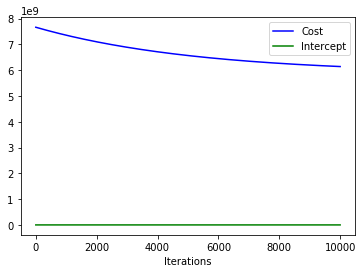

In [98]:
graph_var = np.array(graph_var).T

plt.plot(graph_var[0], graph_var[1],label = "Cost", color = "Blue")
plt.plot(graph_var[0], graph_var[3],label = "Intercept", color = "Green")
plt.xlabel("Iterations")
plt.legend()
plt.show()

In [57]:
def predict(W, B, X_test):
    
    Y_predict = np.dot(W, X_test) + B
    return Y_predict

In [58]:
W = W.reshape((1,1))
X_test = np.array([8450, 9600]).reshape((1,2))
Y_pred = predict(W, B, X_test)
print(Y_pred)

[[141037.71000025 146997.19274356]]


In [51]:
W.shape

(1,)

In [251]:
Z = np.dot(W, X.T) - B
np.dot(Z - Y.T, X)

array([[-2.94942776e+12]])

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X, Y)
print(regressor.coef_)
print(regressor.intercept_)

[ 1.45029563e+00  4.42969972e+04 -4.23673738e+02]
-102150.53018167938


In [57]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=5000, penalty=None, eta0=0.0000001)
sgd_reg.fit(X, Y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[210779.12544539] [-5.8277898]


[[2.09997195]]
[158836.15189688]


In [18]:
Z = np.dot(W, X.T) - B
np.dot(Z - Y.T, X)

array([[-3.43291305e+09]])

In [22]:
print(Z)
print(Y.T)
print(Z - Y.T)
print(X)

[3684.13099687 4185.52513433]
[[208500 181500]]
[[-204815.86900313 -177314.47486567]]
[[8450]
 [9600]]
